**Column Details:**
* **title :** Contains the title of the article or news.
* **text :** This column has the actual written news
* **subject :** Points whether it is a news or politics etc
* **date :** Represents the date of publishing the article
* **class :** Target class representing 1 for fake news and 0 for genuine new.

In [9]:
# importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv("/content/News.csv")
df.head()

,Unnamed: 0,title,text,subject,date,class
0,0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [11]:
df.shape

(44919, 6)

In [12]:
df.columns

Index(['Unnamed: 0', 'title', 'text', 'subject', 'date', 'class'], dtype='object')

* The only useful column here is text and class.
* So we will be removing the other columns.

In [13]:
df.drop(['Unnamed: 0','title','subject','date'], axis=1, inplace=True)

In [15]:
# let's check for any null values
df.isnull().sum()

,0
text,0
class,0


Let's shuffle the data to avoid bias, reset the index and then remove it, since it is also of not any use to us.

In [16]:
df = df.sample(frac=1)
df.reset_index(inplace=True)
df.drop(['index'], axis=1, inplace=True)

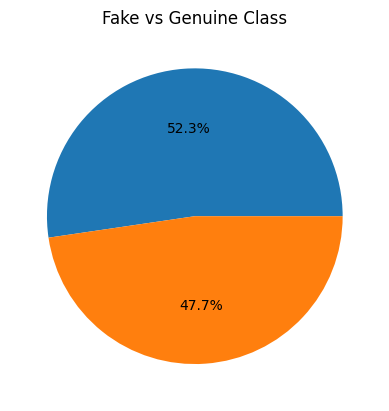

In [22]:
# Class distribution
plt.pie(df['class'].value_counts().values, autopct='%1.1f%%')
plt.title('Fake vs Genuine Class')
plt.show()

In [25]:
from tqdm import tqdm
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
def preprocess_text(text_data):
    preprocessed_text = []

    for sentence in tqdm(text_data):
        sentence = re.sub(r'[^\w\s]', '', sentence)
        preprocessed_text.append(' '.join(token.lower()
                                  for token in str(sentence).split()
                                  if token not in stopwords.words('english')))

    return preprocessed_text

preprocessed_review = preprocess_text(df['text'].values)
preprocessed_review



100%|██████████| 44919/44919 [30:27<00:00, 24.58it/s]


['paris reuters french president emmanuel macron said turkey remained vital partner european union ties maintained even country strayed eu path according newspaper interview published thursday a senior turkish official said eu states must decide whether wanted turkey member sense longer want marriagebut want cohabitation comments french president followed german chancellor angela merkel remarks television debate sunday eu halt membership talks ankara turkey indeed strayed away european union recent months worryingly overstepped mark ways cannot ignored macron told greece kathimerini newspaper but i want avoid split vital partner many crises face notably immigration challenge terrorist threat the eu eager preserve deal turkey stemmed mass migration via turkish territory people conflict areas turkey past questioned eu sincerity keeping side arrangement relations ankara european union deteriorated since failed july 2016 coup followed arrests tens thousands people across country critics ac

In [27]:
df['text'] = preprocessed_review

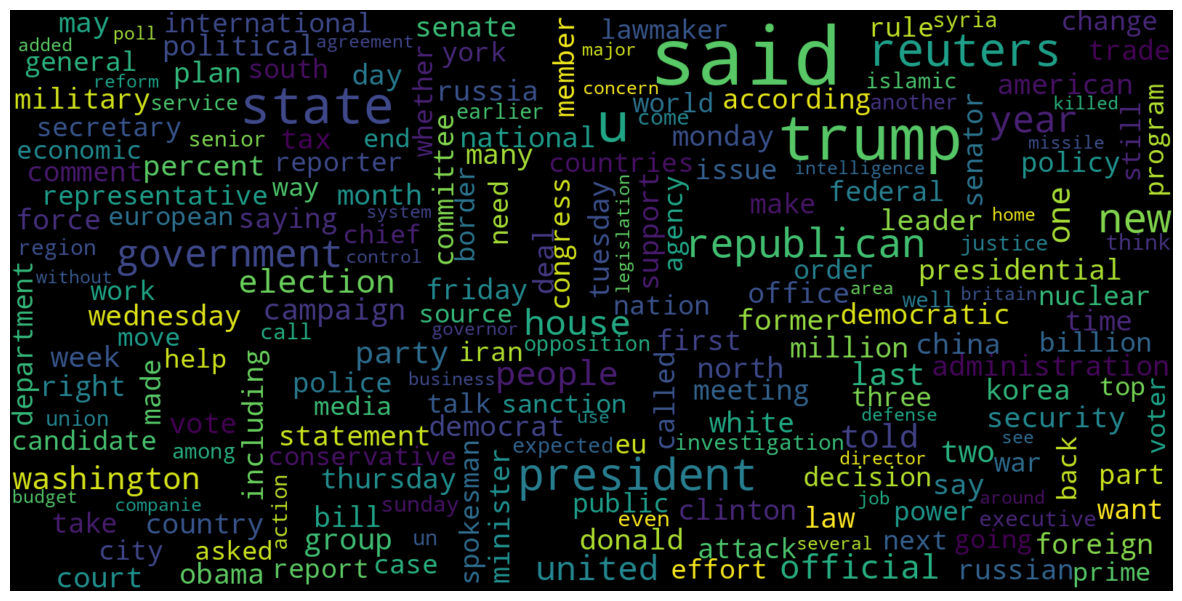

In [28]:
# Let's visualize the woedcloud for fake and real news separately
# Real News WrodCloud
consolidated = ' '.join(word for word in df['text'][df['class'] == 1].astype(str))
wordCloud = WordCloud(width=1600, height=800,
                      random_state=42,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

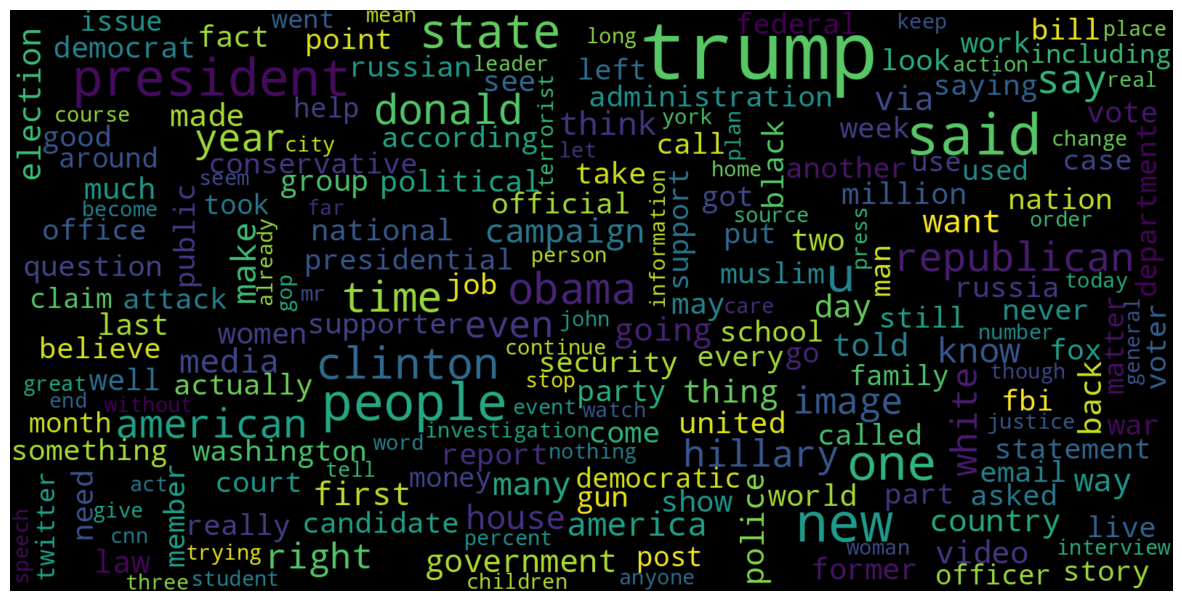

In [29]:
# Fake News WrodCloud
consolidated = ' '.join(word for word in df['text'][df['class'] == 0].astype(str))
wordCloud = WordCloud(width=1600, height=800,
                      random_state=42,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

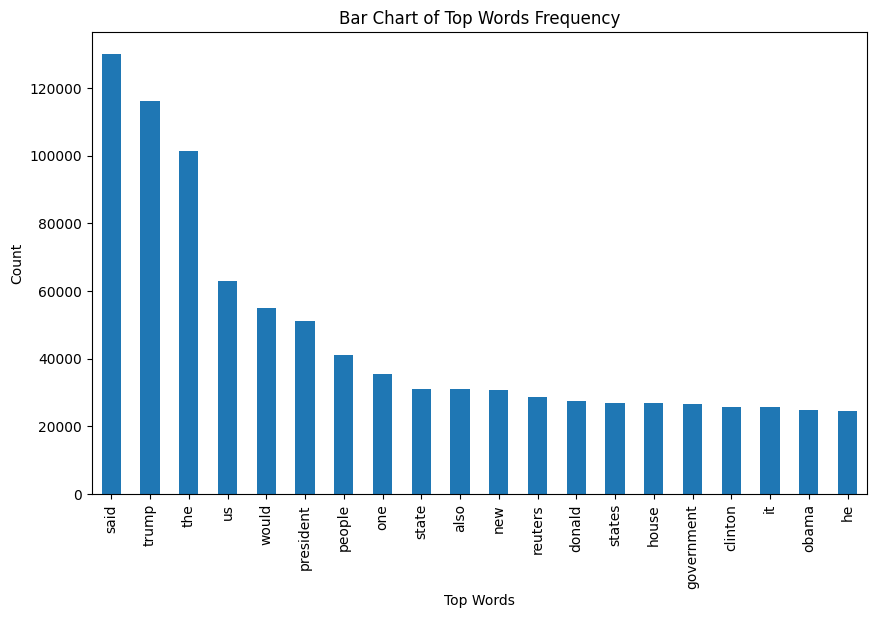

In [31]:
# Let's create a bargraph of 20 most frequent words
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df['text'], 20)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])

df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel = "Top Words",
    ylabel = "Count",
    title = "Bar Chart of Top Words Frequency"
)